# Researching on Stock Data

In [2]:
!pip install yfinance pandas-datareader

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import plotly.graph_objects as go 
import plotly.express as px

## Getting TCS Stock Data

In [8]:
tcs = yf.Ticker("TCS")
tcs_data = tcs.history(period="max")
tcs_data.reset_index(inplace=True)
tcs_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-11-01 00:00:00-04:00,32.717391,34.586956,30.006520,33.839130,14667600,0.0,0.0
1,2013-11-04 00:00:00-05:00,34.399999,34.399999,32.427607,33.044563,1586600,0.0,0.0
2,2013-11-05 00:00:00-05:00,32.820217,33.184782,32.549130,33.044563,337700,0.0,0.0
3,2013-11-06 00:00:00-05:00,33.287609,34.110219,33.287609,33.558697,549600,0.0,0.0
4,2013-11-07 00:00:00-05:00,34.400000,34.400000,31.894782,33.007175,883700,0.0,0.0


In [9]:
tcs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          2640 non-null   datetime64[ns, America/New_York]
 1   Open          2640 non-null   float64                         
 2   High          2640 non-null   float64                         
 3   Low           2640 non-null   float64                         
 4   Close         2640 non-null   float64                         
 5   Volume        2640 non-null   int64                           
 6   Dividends     2640 non-null   float64                         
 7   Stock Splits  2640 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 165.1 KB


In [11]:
tcs_data.shape

(2640, 8)

In [13]:
tcs_data.Date[0]

Timestamp('2013-11-01 00:00:00-0400', tz='America/New_York')

In [15]:
tcs_data.Date[2639]

Timestamp('2024-04-30 00:00:00-0400', tz='America/New_York')

## Data Viz.

In [17]:
tcs_data.Date.dtype

datetime64[ns, America/New_York]

In [18]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

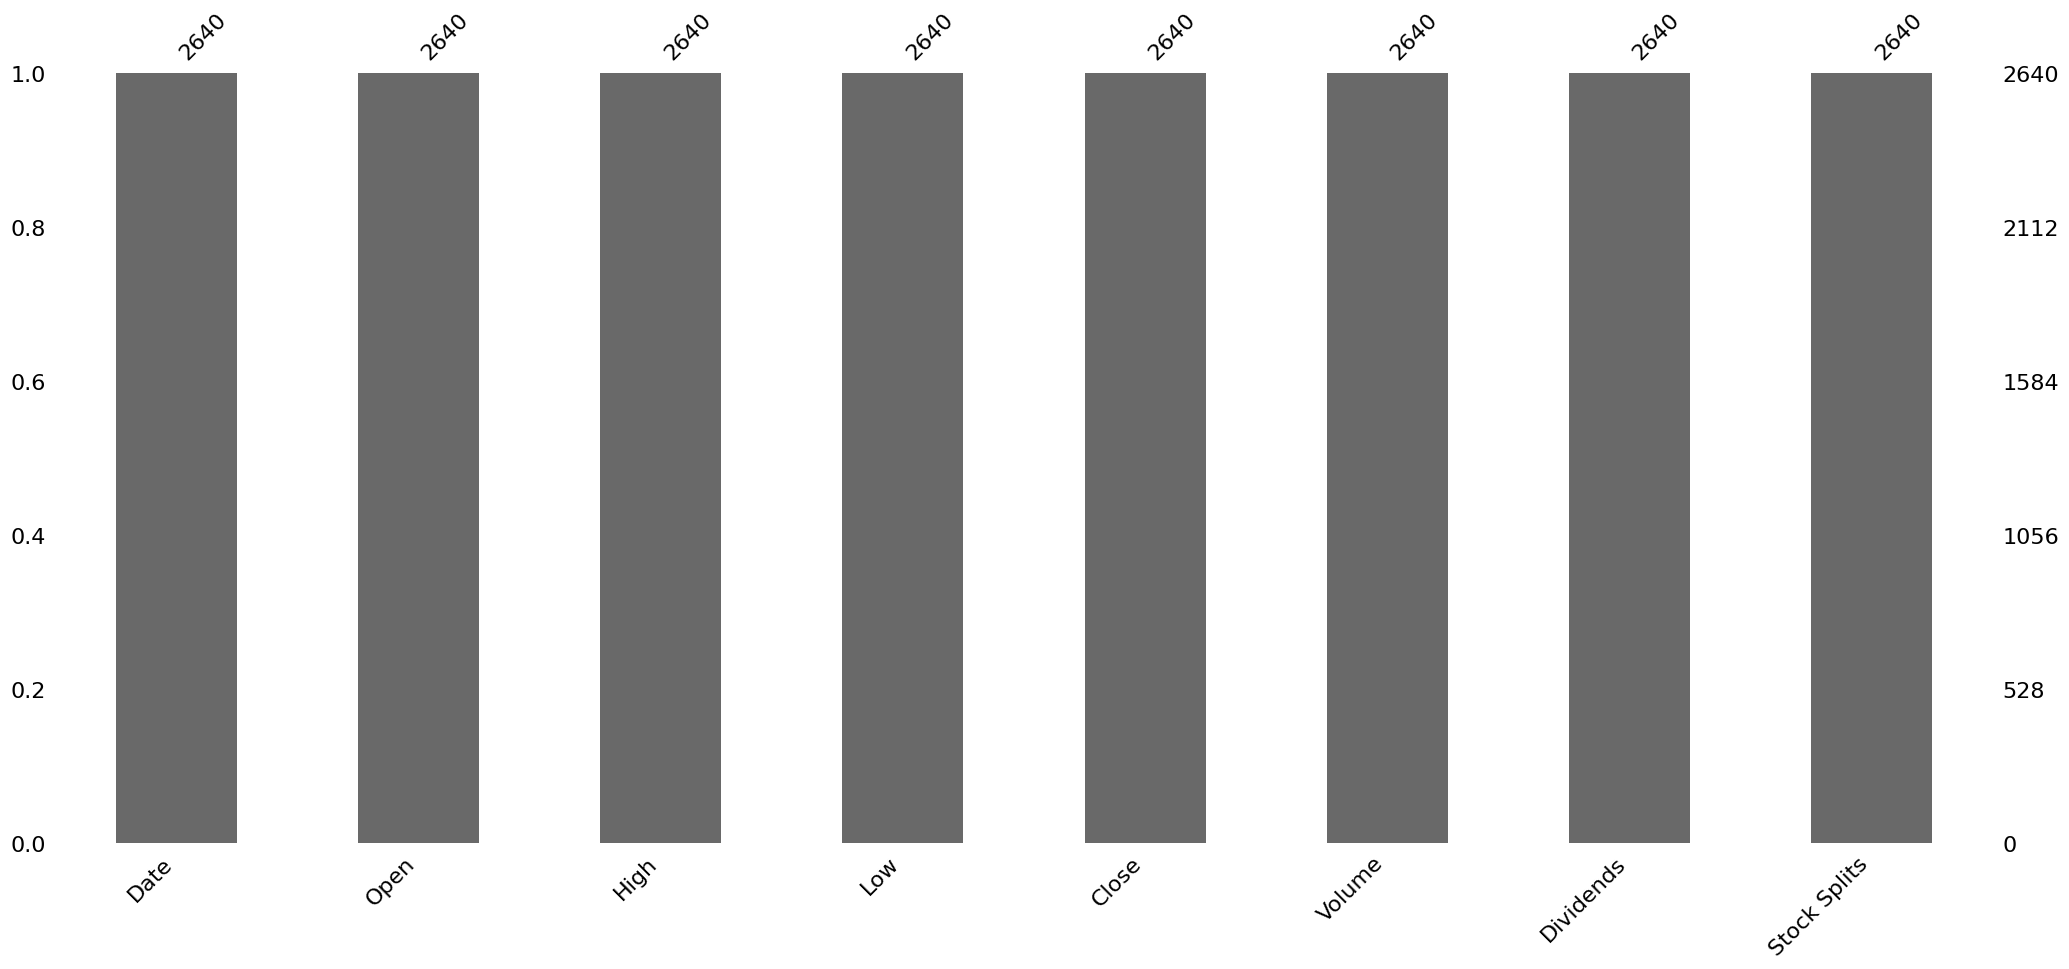

In [19]:
import missingno as mno

mno.bar(tcs_data)

In [24]:
tcs_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [26]:
tcs_data.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### CandleStick Chart

In [27]:
fig = go.Figure(data=[go.Candlestick(x=tcs_data['Date'],
                open=tcs_data['Open'],
                high=tcs_data['High'],
                low=tcs_data['Low'],
                close=tcs_data['Close'])])

fig.show()